# Assignment 2

## Prepared by: Simon Chang
## Student Id: 993141177

# Loading Required Packages

In [1]:
!pip install wordcloud
!pip install whoosh

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import os, os.path
import shutil

import re, nltk
from nltk.stem import*
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from html.parser import HTMLParser
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer        

from whoosh.analysis import*
from whoosh.qparser import QueryParser
from whoosh import index, writing, scoring
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import seaborn as sns

# 1. Data Cleaning

## Remove: All html tags and attributes are moved

In [375]:
# Starting with the Generic Tweet File
data_tweet_generic = pd.read_csv('generic_tweets.txt', encoding = 'utf-8')

In [376]:
#Calling the data
data_tweet_generic.head(10)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [377]:
#Getting ready to convert the text column into a list
g_text = data_tweet_generic.text
g_text_1 = pd.DataFrame(g_text)
g_text_1.head(10)

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
5,@Kwesidei not the whole crew
6,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...
8,@Tatiana_K nope they didn't have it
9,@twittera que me muera ?


In [378]:
#Checking the data type
type(g_text)

pandas.core.series.Series

In [379]:
#Converting series in to list for a faster processing of data cleaning
text_list = g_text_1["text"].tolist()

In [380]:
#State of tweets before cleaning
text_list

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [381]:
#HTML character codes replaced
for i in range(len(text_list)):
    text_list[i] = HTMLParser().unescape(text_list[i])

C:\Users\gyoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [382]:
#HTML tags removed
for i in range(len(text_list)):
        text_list[i] = re.sub(re.compile('/<[^>]+>/'), '', text_list[i])

In [383]:
#URL removed
for i in range(len(text_list)):
    text_list[i] = re.sub('(\s+\S+.[^\s]+/\S+)','',text_list[i])
    text_list[i] = re.sub('(\s+\S+.ca)','',text_list[i])
    text_list[i] = re.sub('(\s+\S+.uk)','',text_list[i])

In [384]:
#\xa0 removed
for i in range(len(text_list)):
    text_list[i] = re.sub('\xa0','',text_list[i])

In [385]:
#\ufeffl removed
for i in range(len(text_list)):
    text_list[i] = re.sub('\ufeff','',text_list[i])

In [386]:
#Converted into lowercase
for i in range(len(text_list)):
    text_list[i] = text_list[i].lower()

In [387]:
#tokenize to remove punctuations
for i in range(len(text_list)):
    text_list[i] = RegexpTokenizer(r'\w+').tokenize(text_list[i])

In [388]:
#Defining stopwords
stop_words = stopwords.words("english") + ['cdnpoli','elxn43','retweeted']

In [389]:
#Stopwords removal
for i in range(len(text_list)):
    
    cleaned_text = list(filter(lambda x: x not in stop_words, text_list[i]))
    text_list[i] = cleaned_text

In [390]:
#Organizing cleaned data under a new name
for i in range(len(text_list)):
    
    text_list[i] = " ".join(text_list[i])

text_list_generic = text_list

text_list_generic

['switchfoot awww bummer shoulda got david carr third day',
 'upset thatn update facebook texting might cry result school today also blah',
 'kenichan dived many times ball managed save 50 rest go bounds',
 'whole body feels itchy like fire',
 'nationwideclass behaving mad usen see',
 'kwesidei whole crew',
 'need hug',
 'loltrish hey long time see yes rains bit bit lol fine thanks',
 'tatiana_k nope',
 'twittera que muera',
 'spring break plain city snowing',
 'pierced ears',
 'caregiving bear watch thought ua loss embarrassing',
 'octolinz16 counts idk either never talk anymore',
 'smarrison would first gun really though zac snyder doucheclown',
 'iamjazzyfizzle wish got watch miss iamlilnicki premiere',
 'hollis death scene hurt severely watch film wry directors cut',
 'file taxes',
 'lettya ahh ive always wanted see rent love soundtrack',
 'fakerpattypattz oh dear drinking forgotten table drinks',
 'alydesigns day get much done',
 'one mylled asked meet mid valley today time sigh',

In [391]:
#Adding back cleaned data
data_tweet_generic['cleaned']=text_list_generic

In [392]:
data_tweet_generic.head(10)

,class,id,date,query,user,text,cleaned
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset thatn update facebook texting might cry ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad usen see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rains bit bit l...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana_k nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,twittera que muera


# *Generic file has been cleaned*

In [401]:
# Reading in Canadian_Elections_2019.csv file
data_tweet_election = pd.read_csv('Canadian_elections_2019.csv', encoding = 'utf-8')

In [402]:
data_tweet_election.head(10)

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


In [403]:
#Getting ready to convert the text column into a list
g_text = data_tweet_election.text
g_text_1 = pd.DataFrame(g_text)
g_text_1.head(10)

,text
0,"b""@RosieBarton So instead of your suggestion, ..."
1,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,"b""#Canada #taxpayers are sick &amp; tired of h..."
5,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,"b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,"b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


In [404]:
#Checking the data type
type(g_text)

pandas.core.series.Series

In [405]:
#Converting series in to list for a faster processing of data cleaning
text_list = g_text_1["text"].tolist()

In [406]:
#State of tweets before cleaning
text_list

['b"@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman\'s right to have automony over her body. Let\'s go with that.  #cdnpoli #elxn43  #Canada #abortion"',
 'b"#AllWomanSpacewalk it\'s real!\\n@Space_Station \\n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ"',
 'b"#Brantford It\'s going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972"',
 'b"#Canada #CanadaElection2019 #CanadaVotes \\n#elxn43 \\n\\nCan\'t decide? This should help!\\n\\nhttps://t.co/UNe5J1tDJ6"',
 'b"#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don\'t need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk

In [407]:
#removing first character b"
for i in range(len(text_list)):
    text_list[i] = re.sub('b"','',text_list[i])


In [408]:
#removing words with no meaning"
for i in range(len(text_list)):
    text_list[i] = re.sub('xf0','',text_list[i])
    text_list[i] = re.sub('x9f','',text_list[i])
    text_list[i] = re.sub('x80','',text_list[i])
    text_list[i] = re.sub('x99t','',text_list[i])
    text_list[i] = re.sub('x9f','',text_list[i])
    text_list[i] = re.sub('x87','',text_list[i])
    text_list[i] = re.sub('x80','',text_list[i])
    text_list[i] = re.sub('x99','',text_list[i])
    text_list[i] = re.sub('xe2','',text_list[i])
    text_list[i] = re.sub('x80','',text_list[i])
    text_list[i] = re.sub('xc2','',text_list[i])
    text_list[i] = re.sub('xa0','',text_list[i])
    text_list[i] = re.sub('x87','',text_list[i])
    text_list[i] = re.sub('xa6','',text_list[i])

In [409]:
#HTML character codes replaced
for i in range(len(text_list)):
    text_list[i] = HTMLParser().unescape(text_list[i])

C:\Users\gyoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [410]:
#HTML tags removed
for i in range(len(text_list)):
        text_list[i] = re.sub(re.compile('/<[^>]+>/'), '', text_list[i])

In [411]:
#URL removed
for i in range(len(text_list)):
    text_list[i] = re.sub('(\s+\S+.[^\s]+/\S+)','',text_list[i])
    text_list[i] = re.sub('(\s+\S+.ca)','',text_list[i])
    text_list[i] = re.sub('(\s+\S+.uk)','',text_list[i])

In [412]:
#\xa0 removed
for i in range(len(text_list)):
    text_list[i] = re.sub('\xa0','',text_list[i])

In [413]:
#\ufeffl removed
for i in range(len(text_list)):
    text_list[i] = re.sub('\ufeff','',text_list[i])

In [414]:
#Converted into lowercase
for i in range(len(text_list)):
    text_list[i] = text_list[i].lower()

In [415]:
#tokenize to remove punctuations
for i in range(len(text_list)):
    text_list[i] = RegexpTokenizer(r'\w+').tokenize(text_list[i])

In [416]:
#Defining stopwords
stop_words = stopwords.words("english") + ['cdnpoli','elxn43','retweeted']

In [417]:
#Stopwords removal
for i in range(len(text_list)):
    
    cleaned_text = list(filter(lambda x: x not in stop_words, text_list[i]))
    text_list[i] = cleaned_text

In [418]:
#Organizing cleaned data under a new name
for i in range(len(text_list)):
    
    text_list[i] = " ".join(text_list[i])

text_list_election = text_list

text_list_election

['rosiebarton instead suggestion agree canadiann trust andrewscheer conservatives government protect woman right automony body let go canada abortion',
 'allwomanspacewalk real n space_station n etobicokenorth cityofto onpoli',
 'brantford going cost 94 billion next 4 years ask justin',
 'canada canadaelection2019 canadavotes n n ncan decide',
 'canada taxpayers sick tired hard earned donated corporate welfare bums need one many reasons trudeaumustgo n leave canada allre sheila_coppsndal election2019',
 'canadavotes2019 facts blastfromthepast 2012 conservatives introduced end long gun registry even though heads police across canada victims groups objected crime control public safety gunlobby',
 'cdnmedia ppc rocky dong hands best election video ever please google rocky dong boxes socialism seen go',
 'liberals double promised 2015 national debt next term elected resting 90 billion nationalre program incl ndp coalition 180 billion seems possible imo',
 'chooseforward ncanada make mistak

In [419]:
#Adding back cleaned data
data_tweet_election['cleaned']=text_list_election

In [420]:
data_tweet_election.head(10)

,sentiment,negative_reason,text,cleaned
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia ppc rocky dong hands best election vi...
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",liberals double promised 2015 national debt ne...
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...


# 2. Exploratory Analysis

### Graphical Figures

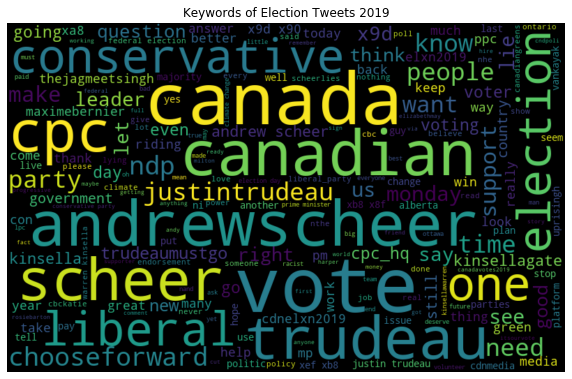

In [42]:
#Wordcloud for election dataset
all_words = ' '.join([text for text in text_list_election])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Keywords of Election Tweets 2019')
plt.axis('off')
plt.show()

#### The above wordcloud shows the words that are most shown in the 2019 twitter data. Some of the words that can be spotted includes andrewscheer, Canada, trudeau, election, conservative, cpc and vote. Based on the outcome of the election and some of the leading events up to the election night, it is no surprise that more words that can be spotted are related to andrew scheer and the conservative party. The final few days of news headline emphasized how Scheer wasn't able to deliver what the conservative party has been hoping for and his performance has not been up to par in the last days of the election.

#### It can also be inferred that the liberal party's slogan for the campaign "chooseforward" can be spotted but the conservative party's slogan "it's time for you to get ahead" isn't spotted. Which means that people did not mention conservative party's slogan as much as the liberal party's slogan.

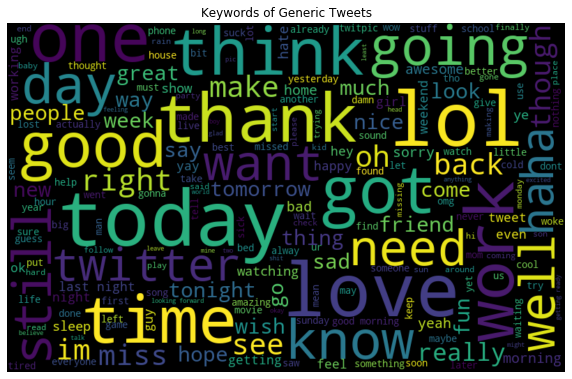

In [43]:
#Wordcloud for Generic dataset
all_words = ' '.join([text for text in text_list_generic])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Keywords of Generic Tweets')
plt.axis('off')
plt.show()

#### The above wordcloud shows the words that are most shown in the generic twitter data. Some of the words that can be spotted include thank, today, lol, time, know, think, going, got, need, love, work and one. Since this is a generic collection of twitter data, it makes sense to see a collection of random words.

### Political Party Classification

### Classification done on 2019 Canadian Election Tweets

In [40]:
Liberal = ('trudeau|justin|chooseforward|justin_trudeau|liberal|lpc|teamtrudeau|liberals|lpcs|snc|lavalin|snc_lavalin|jt')
Conservatives = ('andrew|scheer|andrew_scheer|time for you to get ahead|its time for you to get ahead|cpc|conservative|conservatices')
NDP = ('thejagmeetsingh|in it for you|ndp|new democrats|new democratic party|jagmeet|singh|orange|the new democrats|new dems')

In [41]:
data_tweet_election['Liberal'] = data_tweet_election['cleaned'].str.contains(Liberal)
data_tweet_election['Conservative'] = data_tweet_election['cleaned'].str.contains(Conservatives)
data_tweet_election['NDP'] = data_tweet_election['cleaned'].str.contains(NDP)

In [42]:
data_tweet_election

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,False,True,False
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,False,False,False
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,True,False,False
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,False,False,False
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,True,False,False
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...,False,True,False
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia ppc rocky dong hands best election vi...,False,False,False
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",liberals double promised 2015 national debt ne...,True,False,True
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...,True,False,False
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...,True,True,False


In [43]:
data_tweet_election.loc[data_tweet_election["Liberal"] == True, "Liberal"] = 'Liberal'
data_tweet_election.loc[data_tweet_election["Liberal"] == False, "Liberal"] = None

data_tweet_election.loc[data_tweet_election["Conservative"] == True, "Conservative"] = 'Conservative'
data_tweet_election.loc[data_tweet_election["Conservative"] == False, "Conservative"] = None

data_tweet_election.loc[data_tweet_election["NDP"] == True, "NDP"] = 'NDP'
data_tweet_election.loc[data_tweet_election["NDP"] == False, "NDP"] = None

In [44]:
LPC = data_tweet_election["Liberal"]
CPC = data_tweet_election["Conservative"]
NDP = data_tweet_election["NDP"]

In [190]:
#data_tweet_election['party'] = data_tweet_election['Liberal'].fillna('') + data_tweet_election['Conservative'].fillna('')+ data_tweet_election['NDP'].fillna('')

In [45]:
data_tweet_election

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...,None,Conservative,None
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia ppc rocky dong hands best election vi...,None,None,None
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",liberals double promised 2015 national debt ne...,Liberal,None,NDP
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...,Liberal,None,None
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...,Liberal,Conservative,None


In [47]:
(data_tweet_election["Liberal"].value_counts())

Liberal    613
Name: Liberal, dtype: int64

In [48]:
(data_tweet_election["Conservative"].value_counts())

Conservative    678
Name: Conservative, dtype: int64

In [49]:
(data_tweet_election["NDP"].value_counts())

NDP    244
Name: NDP, dtype: int64

In [54]:
class_party = pd.concat((data_tweet_election["Liberal"],data_tweet_election["Conservative"],data_tweet_election["NDP"]))

In [55]:
class_party.head(10)

0       None
1       None
2    Liberal
3       None
4    Liberal
5       None
6       None
7    Liberal
8    Liberal
9    Liberal
dtype: object

In [62]:
new_class_party = pd.DataFrame(class_party.dropna(), columns = ["party_category"])

In [63]:
new_class_party.head(10)

,party_category
2,Liberal
4,Liberal
7,Liberal
8,Liberal
9,Liberal
11,Liberal
14,Liberal
20,Liberal
23,Liberal
24,Liberal


Text(0.5, 1.0, 'Distribution of the Political Affliation of the Tweets')

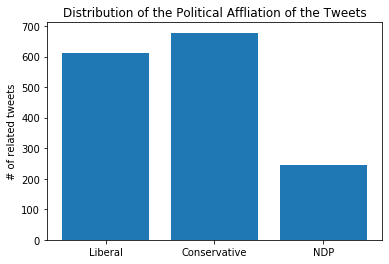

In [64]:
# plot a histogram
x = Counter(new_class_party['party_category'])
l = range(len(x.keys()))
plt.bar(l, x.values(), align='center')
plt.xticks(l, x.keys())
plt.ylabel('# of related tweets')
plt.title('Distribution of the Political Affliation of the Tweets')

#### The above graph shows more tweets about conservative party vs. liberal. As the word cloud from the earlier explained, since conservative party made the news headline more than the liberals in the final days of the campaign, there are more tweets regarding the conservatives than liberals.

# 3. Model Preparation

In [136]:
# Checking out the data view
data_tweet_generic.head(10)

,class,id,date,query,user,text,cleaned
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset thatn update facebook texting might cry ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad usen see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rains bit bit l...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana_k nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,twittera que muera


In [145]:
X = data_tweet_generic.cleaned

In [146]:
y = data_tweet_generic['class']

In [147]:
#70% & 30% split for training and test data
# "cleaned" data represents each line of tweet in the data set and "class" represents the sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data_tweet_generic["cleaned"].values, data_tweet_generic["class"].values, test_size=0.3, random_state=42)

In [148]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140000,) (60000,) (140000,) (60000,)


## Bag of Words & TF-IDF

#### Bag of Words: 1st method

In [393]:
#Bag of Words: First Option

#Define Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# find out all the unique words in snippets and save them to word_counter
all_words=[]
word_counter = Counter()
for snippet in data_tweet_generic['cleaned']:
    words = tokenizer.tokenize(snippet)
    all_words.extend(words)
    word_counter.update(all_words)

# save the most common 20 words to word_list
word_list = [word for (word, freq) in word_counter.most_common(20)]
word_list

['day',
 'work',
 'go',
 'get',
 'like',
 'good',
 'today',
 'back',
 'going',
 'got',
 'time',
 'really',
 'im',
 'one',
 'still',
 'want',
 'know',
 'lol',
 'night',
 'love']

In [421]:
# for each term, calculate its term frequency
tf_doc=[]
for snippet in data_tweet_election['cleaned']:
  freq_counter = Counter()
  terms = tokenizer.tokenize(snippet)
  freq_counter.update(terms) 
  tf_doc.append([freq_counter[w]/len(terms) for w in word_list]) # tf = frequency/length of doc

In [422]:
TF_df = pd.DataFrame(tf_doc, columns=word_list)
TF_df

,day,work,go,get,like,good,today,back,going,got,time,really,im,one,still,want,know,lol,night,love
0,0.000000,0.0,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.047619,0.000000,0.000000,0.000000,0.0,0.000000,0.00
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
6,0.000000,0.0,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
7,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00


### Inverse Document Frequency

In [106]:
import math

# for each terms, calculate its inverse document frequency
from collections import OrderedDict
idf_dict=OrderedDict()
N = len(data_tweet_generic['cleaned']) # total number of documents

for word in word_list:
  idf_dict[word]=0
  for snippet in data_tweet_generic['cleaned']:
    if word in snippet:
      idf_dict[word] += 1
      
for word, val in idf_dict.items():
  idf_dict[word] = math.log10(N/(val+1)) # log(N/(df+1)), +1 in case val=0

In [107]:
df_idf = pd.DataFrame.from_dict(idf_dict, orient='index', columns=['idf'])
df_idf

,idf
n,0.053619
b,0.332477
vote,2.887730
canada,3.190440
scheer,5.000000
andrewscheer,5.301030
trudeau,5.301030
election,3.619789
party,2.191114
justintrudeau,5.301030


In [108]:
idf = np.array(list(idf_dict.values()))

In [109]:
idf

array([0.05361898, 0.33247701, 2.88773023, 3.19044029, 5.        ,
       5.30103   , 5.30103   , 3.61978876, 2.19111413, 5.30103   ,
       5.        , 1.00370728, 1.29251499, 1.88924199, 3.09151498,
       5.30103   , 2.1527359 , 1.1343927 , 5.30103   , 1.48392759])

#### Bag of Words 2nd Method

In [110]:
#Bag of Words 2nd method

from sklearn.feature_extraction.text import CountVectorizer

# vectorize
bow_transformer = CountVectorizer(analyzer='word').fit(data_tweet_generic['cleaned'])

In [111]:
# print total number of vocab words
print(len(bow_transformer.vocabulary_))

148359


In [112]:
# example of vectorized text
sample_tweet = data_tweet_generic['cleaned'][111]
print(sample_tweet)
print('\n')

sooo sad killed kutner house whyyyyyyyy




In [113]:
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

  (0, 58987)	1
  (0, 72010)	1
  (0, 73812)	1
  (0, 113049)	1
  (0, 121673)	1
  (0, 143292)	1




In [82]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(data_tweet_generic['cleaned'])

In [83]:
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (200000, 148359)
Amount of Non-Zero occurences:  1428999


#### TF-IDT: 1st Method

In [84]:
TF_matrix = TF_df.to_numpy()
IDF = np.array(list(idf_dict.values()))
TF_IDF = np.multiply(TF_matrix,IDF)
df_tfidf = pd.DataFrame(TF_IDF, columns=word_list)

In [85]:
df_tfidf

,n,b,vote,canada,scheer,andrewscheer,trudeau,election,party,justintrudeau,cpc,one,like,people,ndp,chooseforward,monday,get,kinsella,know
0,0.000000,0.000000,0.000000,0.047407,0.000000,0.058220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001935,0.000000,0.000000,0.121903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000322,0.000000,0.000000,0.081269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.035555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049934,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145953,0.000000,0.000000,0.000000,0.000000
9,0.001563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082409,0.000000


#### TF-IDF: 2nd Method

In [114]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 143292)	0.5862894702734547
  (0, 121673)	0.33125068230807453
  (0, 113049)	0.25413121083871093
  (0, 73812)	0.48634546993586336
  (0, 72010)	0.4014861813045943
  (0, 58987)	0.2902273251933321


In [115]:
# some IDF (inverse document frequency) example
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['justin']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['singh']])

8.929411526501617
11.596639733083574


In [116]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)


(200000, 148359)


# BONUS: Word2vec Feature Engineering

In [331]:
# Import core libraries
!pip install tweepy
import tweepy           # Obtain Tweets via API
import re               # Obtain expressions 
from gensim.models import Word2Vec    #Import gensim Word2Fec

In [358]:
#Bring text_list to tokenize:
for i in range(len(text_list)):
    text_list[i] = RegexpTokenizer(r'\w+').tokenize(text_list[i])

In [362]:
# Train a Word2Vec model
model = Word2Vec(text_list, min_count=1)
# summarize the loaded model
print(model)

# summarise vocabulary
words = list(model.wv.vocab)
print(words[0:10])

# access vector for one word for reference
print(model['we'])

Word2Vec(vocab=11503, size=100, alpha=0.025)
['RosieBarton', 'So', 'instead', 'of', 'your', 'suggestion', 'how', 'about', 'we', 'agree']


C:\Users\gyoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


[ 0.34173584 -0.7460624   0.5851087  -0.57655025 -0.61359674 -0.82422173
  0.85284454 -0.62972647  1.2289984  -0.2838856   0.05447444 -0.5655648
  0.10732051  0.9075738  -0.28850934  0.3248428   0.21746133  0.59136796
 -1.5265923  -0.12522028  0.28751755 -0.77017236  0.628372   -0.73244655
  1.238262    0.16831088 -1.4548658   0.10468303 -1.409818   -0.7628736
  0.10120174  0.34913698 -0.3753919   0.32647482  0.0184285   1.4474357
  0.65749073  0.16775084 -0.9503313   0.36021176 -0.43090877 -0.18804866
 -0.4850133  -0.5803163  -1.3752431  -0.35184476 -0.3228641  -0.50386715
  0.6259824   0.6007898   0.03209271 -0.82145965  1.0662569   0.06485932
  1.4237983  -1.237945    0.6425618   0.11934952 -0.10776871  0.7477543
  0.44456032 -0.5121639   0.0422086   0.1710923   0.07684723  1.2244887
 -0.5413764   0.2361996   0.30865178  0.28993532  0.04491711  0.86632377
 -0.64866084  0.14281172  0.41581047 -0.32320628 -0.3289211   0.12526484
 -0.28523442  0.22958627 -1.0106162   0.40845513  0.2241

In [363]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\gyoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [364]:
result

array([[ 0.9745617 , -0.02885334],
       [ 1.9127419 , -0.09598967],
       [ 0.28353444, -0.00542068],
       ...,
       [-0.2258639 ,  0.01248407],
       [-0.27570906,  0.01285728],
       [-0.28030667,  0.01859783]], dtype=float32)

# 4. Model Implementation

### 4.1 Application and Accuracy Values

# a) Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

In [71]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7508
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     29851
           4       0.78      0.70      0.74     30149

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



# b) Support Vector Machine (SVM)

In [91]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [92]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7196166666666667
              precision    recall  f1-score   support

           0       0.77      0.62      0.69     29851
           4       0.69      0.82      0.75     30149

    accuracy                           0.72     60000
   macro avg       0.73      0.72      0.72     60000
weighted avg       0.73      0.72      0.72     60000



# c) Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6911833333333334
              precision    recall  f1-score   support

           0       0.68      0.71      0.70     29851
           4       0.70      0.67      0.69     30149

    accuracy                           0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000



# d) KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [155]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5737
              precision    recall  f1-score   support

           0       0.59      0.45      0.51     29851
           4       0.56      0.69      0.62     30149

    accuracy                           0.57     60000
   macro avg       0.58      0.57      0.57     60000
weighted avg       0.58      0.57      0.57     60000



# e) Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=500)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [161]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6579
              precision    recall  f1-score   support

           0       0.69      0.56      0.62     29851
           4       0.63      0.75      0.69     30149

    accuracy                           0.66     60000
   macro avg       0.66      0.66      0.65     60000
weighted avg       0.66      0.66      0.65     60000



# f) Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators = 200, random_state = 0)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [125]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.75375
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     29851
           4       0.76      0.75      0.75     30149

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



# g) XGboost

In [122]:
import xgboost as xgb

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(random_state=1,learning_rate=0.01)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [123]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.56685
              precision    recall  f1-score   support

           0       0.54      0.94      0.68     29851
           4       0.76      0.20      0.32     30149

    accuracy                           0.57     60000
   macro avg       0.65      0.57      0.50     60000
weighted avg       0.65      0.57      0.50     60000



# h) Doc2vec and Logistic Regression

In [59]:
!pip install gensim
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(data_tweet_generic["cleaned"].values, data_tweet_generic["class"].values, test_size=0.3, random_state=0)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test



In [60]:
all_data[:2]

[TaggedDocument(words=['im', 'like', 'sleepy', 'butnnot', 'sleep', 'im', 'gonna'], tags=['Train_0']),
 TaggedDocument(words=['ddlovato', 'bad', 'summer', 'tour', 'comming', 'norway'], tags=['Train_1'])]

In [61]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

# range(2) should actually be more like 30 but to save computational time used 3. 
for epoch in range(3): 
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 200000/200000 [00:00<00:00, 828655.90it/s]


In [62]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [63]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)


C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.65675
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     29847
           4       0.66      0.65      0.66     30153

    accuracy                           0.66     60000
   macro avg       0.66      0.66      0.66     60000
weighted avg       0.66      0.66      0.66     60000



In [65]:
confusion_matrix(y_test, y_pred)

array([[19831, 10016],
       [10579, 19574]], dtype=int64)

# i) BONUS (Deep Learning Algorithms) Neural Net for Text Classification

In [96]:
!pip install tensorflow

In [97]:
!pip install keras

In [99]:
import itertools
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(data_tweet_generic) * .7)
train_posts = data_tweet_generic['cleaned'][:train_size]
train_tags = data_tweet_generic['class'][:train_size]

test_posts = data_tweet_generic['cleaned'][train_size:]
test_tags = data_tweet_generic['class'][train_size:]

max_words = 6000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)


In [100]:
print(x_train.shape, x_test.shape)

(140000, 6000) (60000, 6000)


In [73]:
x_train[0:4]
len(x_train[0])

6000

In [74]:
x_train[0:4]
len(x_train[0])

(6000, 6000, 6000)

In [75]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [76]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [77]:
batch_size = 32
epochs = 5

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 126000 samples, validate on 14000 samples
Epoch 1/5


  5952/126000 [>.............................] - ETA: 1:43:54 - loss: 0.6733 - accuracy: 0.750 - ETA: 54:45 - loss: 0.6736 - accuracy: 0.7500  - ETA: 38:50 - loss: 0.6675 - accuracy: 0.770 - ETA: 30:26 - loss: 0.6581 - accuracy: 0.789 - ETA: 25:13 - loss: 0.6559 - accuracy: 0.781 - ETA: 21:40 - loss: 0.6485 - accuracy: 0.786 - ETA: 17:03 - loss: 0.6400 - accuracy: 0.785 - ETA: 15:41 - loss: 0.6374 - accuracy: 0.777 - ETA: 14:35 - loss: 0.6388 - accuracy: 0.768 - ETA: 13:37 - loss: 0.6301 - accuracy: 0.772 - ETA: 12:46 - loss: 0.6233 - accuracy: 0.778 - ETA: 12:05 - loss: 0.6221 - accuracy: 0.774 - ETA: 11:32 - loss: 0.6155 - accuracy: 0.781 - ETA: 11:00 - loss: 0.6150 - accuracy: 0.779 - ETA: 10:33 - loss: 0.6068 - accuracy: 0.785 - ETA: 10:12 - loss: 0.6009 - accuracy: 0.786 - ETA: 9:53 - loss: 0.5900 - accuracy: 0.796 - ETA: 9:39 - loss: 0.5845 - accuracy: 0.79 - ETA: 9:22 - loss: 0.5820 - accuracy: 0.79 - ETA: 9:08 - loss: 0.5813 - accuracy: 0.79 - ETA: 8:56 - loss: 0.5795 - accurac

 42688/126000 [=========>....................] - ETA: 3:19 - loss: 0.4218 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4217 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4217 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4216 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4215 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4214 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4212 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4212 - accuracy: 0.81 - ETA: 3:19 - loss: 0.4212 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4214 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4215 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4215 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4214 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4213 - accuracy: 0.81 - ETA: 3:18 - loss: 0.4213 - 

 48640/126000 [==========>...................] - ETA: 3:08 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:08 - loss: 0.4166 - accuracy: 0.82 - ETA: 3:08 - loss: 0.4166 - accuracy: 0.82 - ETA: 3:08 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4166 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4166 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4165 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4166 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4165 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4165 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4165 - accuracy: 0.82 - ETA: 3:07 - loss: 0.4165 - accuracy: 0.82 - ETA: 3:06 - loss: 0.4166 - accuracy: 0.82 - ETA: 3:06 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:06 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:06 - loss: 0.4168 - accuracy: 0.82 - ETA: 3:06 - loss: 0.4167 - accuracy: 0.82 - ETA: 3:06 - loss: 0.4167 - 

 54624/126000 [============>.................] - ETA: 2:55 - loss: 0.4123 - accuracy: 0.82 - ETA: 2:55 - loss: 0.4123 - accuracy: 0.82 - ETA: 2:55 - loss: 0.4122 - accuracy: 0.82 - ETA: 2:55 - loss: 0.4124 - accuracy: 0.82 - ETA: 2:55 - loss: 0.4124 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4123 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4123 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4122 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4124 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4126 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4126 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4126 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:54 - loss: 0.4125 - 

 60608/126000 [=============>................] - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4094 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4096 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4094 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4094 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4094 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:43 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:42 - loss: 0.4096 - accuracy: 0.82 - ETA: 2:42 - loss: 0.4096 - accuracy: 0.82 - ETA: 2:42 - loss: 0.4095 - accuracy: 0.82 - ETA: 2:42 - loss: 0.4094 - accuracy: 0.82 - ETA: 2:42 - loss: 0.4094 - 

 66592/126000 [==============>...............] - ETA: 2:29 - loss: 0.4074 - accuracy: 0.82 - ETA: 2:29 - loss: 0.4074 - accuracy: 0.82 - ETA: 2:29 - loss: 0.4073 - accuracy: 0.82 - ETA: 2:29 - loss: 0.4073 - accuracy: 0.82 - ETA: 2:29 - loss: 0.4073 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4072 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4072 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4072 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4072 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4072 - accuracy: 0.82 - ETA: 2:28 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:27 - loss: 0.4071 - accuracy: 0.82 - ETA: 2:27 - loss: 0.4070 - accuracy: 0.82 - ETA: 2:27 - loss: 0.4070 - accuracy: 0.82 - ETA: 2:27 - loss: 0.4070 - accuracy: 0.82 - ETA: 2:27 - loss: 0.4070 - accuracy: 0.82 - ETA: 2:27 - loss: 0.4071 - 

 72832/126000 [================>.............] - ETA: 2:13 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4053 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4053 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:13 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4052 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4051 - 

 78784/126000 [=================>............] - ETA: 1:58 - loss: 0.4034 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4034 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4034 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4034 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4033 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4032 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4032 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4031 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4031 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4031 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4031 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4030 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4030 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4029 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4028 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4029 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4029 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4028 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4028 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4028 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4028 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4027 - 

 84736/126000 [===================>..........] - ETA: 1:43 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4012 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4012 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4012 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4012 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4012 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4012 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4014 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4014 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4014 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4013 - 

 90688/126000 [====================>.........] - ETA: 1:30 - loss: 0.4005 - accuracy: 0.82 - ETA: 1:30 - loss: 0.4005 - accuracy: 0.82 - ETA: 1:30 - loss: 0.4005 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4003 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4003 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4005 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4005 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4005 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4005 - 

 96640/126000 [======================>.......] - ETA: 1:16 - loss: 0.3990 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3989 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3988 - 

102592/126000 [=======================>......] - ETA: 1:03 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3975 - 

108544/126000 [========================>.....] - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 50s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3967 - accuracy: 0.829 - ETA: 49s - loss: 0.3966 - accuracy: 0.829 - ETA: 49s - loss: 0.3966 - accuracy: 0.829 - ETA: 49s - loss: 0.3965 - accuracy: 0.829 - ETA: 49s - loss: 0.3965 - a

114496/126000 [==========================>...] - ETA: 37s - loss: 0.3955 - accuracy: 0.830 - ETA: 37s - loss: 0.3954 - accuracy: 0.830 - ETA: 37s - loss: 0.3954 - accuracy: 0.830 - ETA: 37s - loss: 0.3954 - accuracy: 0.830 - ETA: 37s - loss: 0.3954 - accuracy: 0.830 - ETA: 37s - loss: 0.3954 - accuracy: 0.830 - ETA: 37s - loss: 0.3953 - accuracy: 0.830 - ETA: 37s - loss: 0.3953 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3955 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3955 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3955 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - accuracy: 0.830 - ETA: 36s - loss: 0.3955 - accuracy: 0.830 - ETA: 36s - loss: 0.3955 - accuracy: 0.830 - ETA: 36s - loss: 0.3954 - a

120480/126000 [===========================>..] - ETA: 24s - loss: 0.3949 - accuracy: 0.830 - ETA: 24s - loss: 0.3948 - accuracy: 0.830 - ETA: 24s - loss: 0.3949 - accuracy: 0.830 - ETA: 24s - loss: 0.3949 - accuracy: 0.830 - ETA: 24s - loss: 0.3949 - accuracy: 0.830 - ETA: 24s - loss: 0.3949 - accuracy: 0.830 - ETA: 24s - loss: 0.3948 - accuracy: 0.830 - ETA: 24s - loss: 0.3948 - accuracy: 0.830 - ETA: 24s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3949 - accuracy: 0.830 - ETA: 23s - loss: 0.3949 - accuracy: 0.830 - ETA: 23s - loss: 0.3949 - accuracy: 0.830 - ETA: 23s - loss: 0.3949 - accuracy: 0.830 - ETA: 23s - loss: 0.3949 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - accuracy: 0.830 - ETA: 23s - loss: 0.3948 - a

126000/126000 [==============================] - ETA: 11s - loss: 0.3941 - accuracy: 0.830 - ETA: 11s - loss: 0.3941 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3940 - accuracy: 0.830 - ETA: 11s - loss: 0.3939 - accuracy: 0.830 - ETA: 11s - loss: 0.3939 - accuracy: 0.830 - ETA: 10s - loss: 0.3939 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - accuracy: 0.830 - ETA: 10s - loss: 0.3939 - accuracy: 0.830 - ETA: 10s - loss: 0.3939 - accuracy: 0.830 - ETA: 10s - loss: 0.3939 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - accuracy: 0.830 - ETA: 10s - loss: 0.3938 - a

  6208/126000 [>.............................] - ETA: 8:42 - loss: 0.4285 - accuracy: 0.84 - ETA: 6:20 - loss: 0.3711 - accuracy: 0.84 - ETA: 5:24 - loss: 0.3532 - accuracy: 0.84 - ETA: 5:02 - loss: 0.3838 - accuracy: 0.82 - ETA: 4:46 - loss: 0.3897 - accuracy: 0.82 - ETA: 4:33 - loss: 0.4006 - accuracy: 0.82 - ETA: 4:26 - loss: 0.3730 - accuracy: 0.84 - ETA: 4:28 - loss: 0.3594 - accuracy: 0.85 - ETA: 4:36 - loss: 0.3608 - accuracy: 0.84 - ETA: 4:36 - loss: 0.3441 - accuracy: 0.85 - ETA: 4:32 - loss: 0.3367 - accuracy: 0.85 - ETA: 4:30 - loss: 0.3322 - accuracy: 0.86 - ETA: 4:25 - loss: 0.3269 - accuracy: 0.86 - ETA: 4:14 - loss: 0.3161 - accuracy: 0.87 - ETA: 4:06 - loss: 0.3212 - accuracy: 0.86 - ETA: 4:02 - loss: 0.3189 - accuracy: 0.87 - ETA: 4:01 - loss: 0.3162 - accuracy: 0.87 - ETA: 3:59 - loss: 0.3175 - accuracy: 0.87 - ETA: 3:56 - loss: 0.3144 - accuracy: 0.86 - ETA: 3:57 - loss: 0.3142 - accuracy: 0.86 - ETA: 3:57 - loss: 0.3201 - accuracy: 0.86 - ETA: 4:04 - loss: 0.3227 - 

 42656/126000 [=========>....................] - ETA: 2:56 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3336 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3336 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3339 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3339 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3338 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:54 - loss: 0.3336 - accuracy: 0.85 - ETA: 2:54 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:54 - loss: 0.3335 - 

 48608/126000 [==========>...................] - ETA: 2:43 - loss: 0.3351 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3351 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3350 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3350 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3349 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3349 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3348 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3348 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3349 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3348 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3346 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3348 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3348 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3348 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3347 - 

 54656/126000 [============>.................] - ETA: 2:31 - loss: 0.3336 - accuracy: 0.85 - ETA: 2:31 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:31 - loss: 0.3336 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3335 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3333 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3333 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3333 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3335 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3335 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3335 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3334 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3333 - accuracy: 0.85 - ETA: 2:30 - loss: 0.3333 - accuracy: 0.85 - ETA: 2:29 - loss: 0.3332 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3332 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3333 - 

 60608/126000 [=============>................] - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3331 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3330 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3330 - accuracy: 0.85 - ETA: 2:18 - loss: 0.3330 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3329 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3330 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3329 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3329 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3328 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3328 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3327 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3327 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3328 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3327 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3328 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3328 - 

 67136/126000 [==============>...............] - ETA: 2:08 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3346 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3345 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3344 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3344 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3344 - accuracy: 0.85 - ETA: 2:06 - loss: 0.3344 - accuracy: 0.85 - ETA: 2:06 - loss: 0.3343 - accuracy: 0.85 - ETA: 2:06 - loss: 0.3343 - accuracy: 0.85 - ETA: 2:06 - loss: 0.3343 - accuracy: 0.85 - ETA: 2:06 - loss: 0.3343 - accuracy: 0.85 - ETA: 2:06 - loss: 0.3342 - accuracy: 0.85 - ETA: 2:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 2:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 2:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 2:05 - loss: 0.3342 - 

 73120/126000 [================>.............] - ETA: 1:54 - loss: 0.3337 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3336 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3333 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3335 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.85 - ETA: 1:53 - loss: 0.3333 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3334 - accuracy: 0.85 - ETA: 1:52 - loss: 0.3333 - 

 79136/126000 [=================>............] - ETA: 1:42 - loss: 0.3333 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3333 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.85 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3334 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3333 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3332 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3332 - 

 85120/126000 [===================>..........] - ETA: 1:30 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:30 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3341 - 

 91328/126000 [====================>.........] - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3343 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3342 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:18 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3339 - accuracy: 0.85 - ETA: 1:17 - loss: 0.3339 - 

 97376/126000 [======================>.......] - ETA: 1:06 - loss: 0.3339 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3340 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3341 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3340 - 

103552/126000 [=======================>......] - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 55s - loss: 0.3338 - accuracy: 0.859 - ETA: 54s - loss: 0.3338 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3338 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3338 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3339 - accuracy: 0.859 - ETA: 54s - loss: 0.3340 - accuracy: 0.859 - ETA: 54s - loss: 0.3340 - a

109600/126000 [=========================>....] - ETA: 43s - loss: 0.3344 - accuracy: 0.859 - ETA: 43s - loss: 0.3344 - accuracy: 0.859 - ETA: 43s - loss: 0.3344 - accuracy: 0.859 - ETA: 43s - loss: 0.3343 - accuracy: 0.859 - ETA: 43s - loss: 0.3343 - accuracy: 0.859 - ETA: 43s - loss: 0.3343 - accuracy: 0.859 - ETA: 43s - loss: 0.3342 - accuracy: 0.859 - ETA: 43s - loss: 0.3343 - accuracy: 0.859 - ETA: 42s - loss: 0.3343 - accuracy: 0.859 - ETA: 42s - loss: 0.3343 - accuracy: 0.859 - ETA: 42s - loss: 0.3343 - accuracy: 0.859 - ETA: 42s - loss: 0.3343 - accuracy: 0.859 - ETA: 42s - loss: 0.3343 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - accuracy: 0.859 - ETA: 42s - loss: 0.3341 - accuracy: 0.859 - ETA: 42s - loss: 0.3341 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - accuracy: 0.859 - ETA: 42s - loss: 0.3342 - a

115552/126000 [==========================>...] - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3347 - accuracy: 0.859 - ETA: 31s - loss: 0.3348 - accuracy: 0.859 - ETA: 31s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3349 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - accuracy: 0.859 - ETA: 30s - loss: 0.3348 - a

121696/126000 [===========================>..] - ETA: 20s - loss: 0.3346 - accuracy: 0.859 - ETA: 20s - loss: 0.3346 - accuracy: 0.859 - ETA: 20s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3346 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 19s - loss: 0.3345 - accuracy: 0.859 - ETA: 18s - loss: 0.3345 - accuracy: 0.859 - ETA: 18s - loss: 0.3345 - accuracy: 0.859 - ETA: 18s - loss: 0.3345 - a

126000/126000 [==============================] - ETA: 8s - loss: 0.3347 - accuracy: 0.85 - ETA: 8s - loss: 0.3347 - accuracy: 0.85 - ETA: 8s - loss: 0.3347 - accuracy: 0.85 - ETA: 8s - loss: 0.3347 - accuracy: 0.85 - ETA: 8s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3347 - accuracy: 0.85 - ETA: 7s - loss: 0.3348 - accuracy: 0.85 - ETA: 7s - loss: 0.3348 - accuracy: 0.85 - ETA: 7s - loss: 0.3348 - accuracy: 0.85 - ETA: 7s - loss: 0.3348 - accuracy: 0.85 - ETA: 7s - loss: 0.3348 - accuracy: 0.85 - ETA: 7s - loss: 0.3349 - accuracy: 0.85 - ETA: 7s - loss: 0.3349 - accuracy: 0.85 - ETA: 7s - loss: 0.3349 - accuracy: 0.85 - ETA: 7s - loss: 0.3349 - accuracy: 0.85 - ETA: 6s - loss: 0.3349 - accuracy: 0.85 - ETA: 6s - loss: 0.3349 - ac

  6016/126000 [>.............................] - ETA: 3:39 - loss: 0.2493 - accuracy: 0.93 - ETA: 4:03 - loss: 0.2527 - accuracy: 0.92 - ETA: 4:08 - loss: 0.2669 - accuracy: 0.91 - ETA: 4:02 - loss: 0.3024 - accuracy: 0.89 - ETA: 4:03 - loss: 0.3237 - accuracy: 0.88 - ETA: 3:59 - loss: 0.3058 - accuracy: 0.89 - ETA: 3:58 - loss: 0.3154 - accuracy: 0.87 - ETA: 4:01 - loss: 0.3268 - accuracy: 0.87 - ETA: 4:04 - loss: 0.3211 - accuracy: 0.87 - ETA: 4:08 - loss: 0.3215 - accuracy: 0.87 - ETA: 4:08 - loss: 0.3162 - accuracy: 0.87 - ETA: 4:04 - loss: 0.3071 - accuracy: 0.88 - ETA: 4:03 - loss: 0.3078 - accuracy: 0.88 - ETA: 4:02 - loss: 0.3005 - accuracy: 0.88 - ETA: 4:03 - loss: 0.2996 - accuracy: 0.88 - ETA: 4:03 - loss: 0.3062 - accuracy: 0.87 - ETA: 4:01 - loss: 0.3060 - accuracy: 0.87 - ETA: 4:01 - loss: 0.3061 - accuracy: 0.87 - ETA: 4:01 - loss: 0.3072 - accuracy: 0.87 - ETA: 4:01 - loss: 0.2975 - accuracy: 0.88 - ETA: 4:02 - loss: 0.2918 - accuracy: 0.88 - ETA: 4:02 - loss: 0.2895 - 

 42176/126000 [=========>....................] - ETA: 2:49 - loss: 0.2762 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2762 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2762 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2762 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2762 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2763 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2761 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2762 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2763 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2763 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2764 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2764 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2764 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2764 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2764 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2764 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2766 - accuracy: 0.89 - ETA: 2:48 - loss: 0.2765 - accuracy: 0.89 - ETA: 2:48 - loss: 0.2765 - accuracy: 0.89 - ETA: 2:48 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:48 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:48 - loss: 0.2766 - 

 49120/126000 [==========>...................] - ETA: 2:40 - loss: 0.2758 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2758 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2758 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2756 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2756 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2756 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2756 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2755 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2755 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2758 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2759 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2759 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2761 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2763 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2763 - 

 55424/126000 [============>.................] - ETA: 2:25 - loss: 0.2776 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2776 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2776 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:25 - loss: 0.2778 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2779 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2778 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2778 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2778 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2777 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2778 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2777 - 

 62272/126000 [=============>................] - ETA: 2:13 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:13 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:13 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2775 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2774 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:11 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:11 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:11 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:11 - loss: 0.2772 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2772 - 

 68448/126000 [===============>..............] - ETA: 1:59 - loss: 0.2770 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2775 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:58 - loss: 0.2775 - 

 75136/126000 [================>.............] - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2777 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2777 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2777 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:47 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:46 - loss: 0.2779 - 

 82048/126000 [==================>...........] - ETA: 1:34 - loss: 0.2782 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2782 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2782 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2782 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2782 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2781 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2781 - 

 88896/126000 [====================>.........] - ETA: 1:21 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:21 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:21 - loss: 0.2771 - accuracy: 0.88 - ETA: 1:21 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:21 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:21 - loss: 0.2772 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2773 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2774 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2775 - 

 96128/126000 [=====================>........] - ETA: 1:08 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:08 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:08 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:08 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:08 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2780 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2779 - accuracy: 0.88 - ETA: 1:07 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:06 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:06 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:06 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:06 - loss: 0.2778 - 

102624/126000 [=======================>......] - ETA: 54s - loss: 0.2787 - accuracy: 0.887 - ETA: 54s - loss: 0.2786 - accuracy: 0.887 - ETA: 54s - loss: 0.2786 - accuracy: 0.888 - ETA: 54s - loss: 0.2786 - accuracy: 0.888 - ETA: 54s - loss: 0.2786 - accuracy: 0.888 - ETA: 54s - loss: 0.2786 - accuracy: 0.888 - ETA: 54s - loss: 0.2786 - accuracy: 0.887 - ETA: 54s - loss: 0.2787 - accuracy: 0.887 - ETA: 54s - loss: 0.2787 - accuracy: 0.887 - ETA: 54s - loss: 0.2787 - accuracy: 0.887 - ETA: 53s - loss: 0.2787 - accuracy: 0.887 - ETA: 53s - loss: 0.2787 - accuracy: 0.887 - ETA: 53s - loss: 0.2787 - accuracy: 0.887 - ETA: 53s - loss: 0.2787 - accuracy: 0.887 - ETA: 53s - loss: 0.2788 - accuracy: 0.887 - ETA: 53s - loss: 0.2788 - accuracy: 0.887 - ETA: 53s - loss: 0.2788 - accuracy: 0.887 - ETA: 53s - loss: 0.2789 - accuracy: 0.887 - ETA: 53s - loss: 0.2788 - accuracy: 0.887 - ETA: 53s - loss: 0.2788 - accuracy: 0.887 - ETA: 53s - loss: 0.2789 - accuracy: 0.887 - ETA: 53s - loss: 0.2788 - a

108800/126000 [========================>.....] - ETA: 42s - loss: 0.2793 - accuracy: 0.887 - ETA: 42s - loss: 0.2793 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 42s - loss: 0.2791 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 42s - loss: 0.2791 - accuracy: 0.887 - ETA: 42s - loss: 0.2791 - accuracy: 0.887 - ETA: 42s - loss: 0.2792 - accuracy: 0.887 - ETA: 41s - loss: 0.2792 - accuracy: 0.887 - ETA: 41s - loss: 0.2793 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - accuracy: 0.887 - ETA: 41s - loss: 0.2794 - a

115424/126000 [==========================>...] - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2799 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 31s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2798 - accuracy: 0.887 - ETA: 30s - loss: 0.2799 - accuracy: 0.887 - ETA: 30s - loss: 0.2799 - accuracy: 0.887 - ETA: 30s - loss: 0.2799 - a

121760/126000 [===========================>..] - ETA: 19s - loss: 0.2802 - accuracy: 0.886 - ETA: 19s - loss: 0.2802 - accuracy: 0.886 - ETA: 19s - loss: 0.2801 - accuracy: 0.886 - ETA: 19s - loss: 0.2801 - accuracy: 0.886 - ETA: 19s - loss: 0.2801 - accuracy: 0.886 - ETA: 19s - loss: 0.2801 - accuracy: 0.886 - ETA: 19s - loss: 0.2801 - accuracy: 0.886 - ETA: 19s - loss: 0.2802 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2802 - accuracy: 0.886 - ETA: 18s - loss: 0.2801 - accuracy: 0.886 - ETA: 18s - loss: 0.2802 - accuracy: 0.886 - ETA: 18s - loss: 0.2802 - accuracy: 0.886 - ETA: 18s - loss: 0.2802 - accuracy: 0.886 - ETA: 18s - loss: 0.2802 - a

126000/126000 [==============================] - ETA: 7s - loss: 0.2814 - accuracy: 0.88 - ETA: 7s - loss: 0.2814 - accuracy: 0.88 - ETA: 7s - loss: 0.2814 - accuracy: 0.88 - ETA: 7s - loss: 0.2814 - accuracy: 0.88 - ETA: 7s - loss: 0.2815 - accuracy: 0.88 - ETA: 7s - loss: 0.2815 - accuracy: 0.88 - ETA: 7s - loss: 0.2815 - accuracy: 0.88 - ETA: 7s - loss: 0.2816 - accuracy: 0.88 - ETA: 7s - loss: 0.2816 - accuracy: 0.88 - ETA: 7s - loss: 0.2815 - accuracy: 0.88 - ETA: 7s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2815 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2815 - accuracy: 0.88 - ETA: 6s - loss: 0.2816 - accuracy: 0.88 - ETA: 6s - loss: 0.2815 - accuracy: 0.88 - ETA: 6s - loss: 0.2815 - accuracy: 0.88 - ETA: 6s - loss: 0.2815 - ac

  6592/126000 [>.............................] - ETA: 4:57 - loss: 0.0882 - accuracy: 0.96 - ETA: 4:37 - loss: 0.1556 - accuracy: 0.95 - ETA: 4:35 - loss: 0.1390 - accuracy: 0.95 - ETA: 4:21 - loss: 0.1537 - accuracy: 0.95 - ETA: 4:09 - loss: 0.1536 - accuracy: 0.95 - ETA: 4:07 - loss: 0.1713 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1911 - accuracy: 0.92 - ETA: 4:06 - loss: 0.1990 - accuracy: 0.91 - ETA: 4:05 - loss: 0.1928 - accuracy: 0.92 - ETA: 4:07 - loss: 0.2074 - accuracy: 0.91 - ETA: 4:07 - loss: 0.2043 - accuracy: 0.91 - ETA: 4:10 - loss: 0.2016 - accuracy: 0.91 - ETA: 4:06 - loss: 0.2012 - accuracy: 0.91 - ETA: 4:09 - loss: 0.1922 - accuracy: 0.92 - ETA: 4:08 - loss: 0.1926 - accuracy: 0.92 - ETA: 4:13 - loss: 0.1860 - accuracy: 0.92 - ETA: 4:13 - loss: 0.1894 - accuracy: 0.92 - ETA: 4:10 - loss: 0.1861 - accuracy: 0.92 - ETA: 4:08 - loss: 0.1873 - accuracy: 0.92 - ETA: 4:09 - loss: 0.1850 - accuracy: 0.92 - ETA: 4:08 - loss: 0.1833 - accuracy: 0.93 - ETA: 4:06 - loss: 0.1924 - 

 47264/126000 [==========>...................] - ETA: 2:38 - loss: 0.2191 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2193 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2194 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2194 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2193 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2191 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2191 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2190 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2191 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2191 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2190 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2193 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2192 - 

 53888/126000 [===========>..................] - ETA: 2:26 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2205 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2205 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2205 - 

 60768/126000 [=============>................] - ETA: 2:13 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2199 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2199 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2200 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2201 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2201 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2201 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2202 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2203 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2202 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2202 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2204 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2203 - accuracy: 0.91 - ETA: 2:11 - loss: 0.2203 - accuracy: 0.91 - ETA: 2:11 - loss: 0.2203 - accuracy: 0.91 - ETA: 2:11 - loss: 0.2202 - 

 68000/126000 [===============>..............] - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2214 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2213 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2214 - 

 75296/126000 [================>.............] - ETA: 1:45 - loss: 0.2219 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2219 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2219 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2218 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2218 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2220 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2220 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2220 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2220 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2220 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2220 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2221 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2221 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2221 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2222 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2222 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2221 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2221 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2222 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2222 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2221 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2222 - 

 81952/126000 [==================>...........] - ETA: 1:31 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2226 - 

 88864/126000 [====================>.........] - ETA: 1:19 - loss: 0.2229 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2229 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2229 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2229 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2230 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2229 - accuracy: 0.91 - ETA: 1:19 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2228 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2227 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2227 - 

 95008/126000 [=====================>........] - ETA: 1:07 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2231 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2232 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2233 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2234 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2234 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2234 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2234 - 

101120/126000 [=======================>......] - ETA: 56s - loss: 0.2239 - accuracy: 0.913 - ETA: 56s - loss: 0.2239 - accuracy: 0.913 - ETA: 56s - loss: 0.2239 - accuracy: 0.913 - ETA: 56s - loss: 0.2239 - accuracy: 0.913 - ETA: 56s - loss: 0.2238 - accuracy: 0.913 - ETA: 56s - loss: 0.2239 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2239 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2237 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2239 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - accuracy: 0.913 - ETA: 55s - loss: 0.2238 - a

107136/126000 [========================>.....] - ETA: 45s - loss: 0.2241 - accuracy: 0.913 - ETA: 45s - loss: 0.2241 - accuracy: 0.913 - ETA: 45s - loss: 0.2241 - accuracy: 0.913 - ETA: 45s - loss: 0.2241 - accuracy: 0.913 - ETA: 45s - loss: 0.2241 - accuracy: 0.913 - ETA: 45s - loss: 0.2240 - accuracy: 0.913 - ETA: 45s - loss: 0.2240 - accuracy: 0.913 - ETA: 45s - loss: 0.2240 - accuracy: 0.913 - ETA: 45s - loss: 0.2240 - accuracy: 0.913 - ETA: 44s - loss: 0.2240 - accuracy: 0.913 - ETA: 44s - loss: 0.2240 - accuracy: 0.913 - ETA: 44s - loss: 0.2239 - accuracy: 0.913 - ETA: 44s - loss: 0.2239 - accuracy: 0.913 - ETA: 44s - loss: 0.2239 - accuracy: 0.913 - ETA: 44s - loss: 0.2239 - accuracy: 0.913 - ETA: 44s - loss: 0.2239 - accuracy: 0.913 - ETA: 44s - loss: 0.2239 - accuracy: 0.913 - ETA: 44s - loss: 0.2240 - accuracy: 0.913 - ETA: 44s - loss: 0.2240 - accuracy: 0.913 - ETA: 44s - loss: 0.2240 - accuracy: 0.913 - ETA: 44s - loss: 0.2241 - accuracy: 0.913 - ETA: 44s - loss: 0.2240 - a

113440/126000 [==========================>...] - ETA: 34s - loss: 0.2238 - accuracy: 0.913 - ETA: 34s - loss: 0.2238 - accuracy: 0.913 - ETA: 34s - loss: 0.2238 - accuracy: 0.913 - ETA: 34s - loss: 0.2238 - accuracy: 0.913 - ETA: 34s - loss: 0.2238 - accuracy: 0.913 - ETA: 34s - loss: 0.2239 - accuracy: 0.913 - ETA: 34s - loss: 0.2239 - accuracy: 0.913 - ETA: 34s - loss: 0.2239 - accuracy: 0.913 - ETA: 34s - loss: 0.2240 - accuracy: 0.913 - ETA: 34s - loss: 0.2240 - accuracy: 0.913 - ETA: 34s - loss: 0.2240 - accuracy: 0.913 - ETA: 33s - loss: 0.2240 - accuracy: 0.913 - ETA: 33s - loss: 0.2240 - accuracy: 0.913 - ETA: 33s - loss: 0.2240 - accuracy: 0.913 - ETA: 33s - loss: 0.2241 - accuracy: 0.913 - ETA: 33s - loss: 0.2240 - accuracy: 0.913 - ETA: 33s - loss: 0.2241 - accuracy: 0.913 - ETA: 33s - loss: 0.2241 - accuracy: 0.913 - ETA: 33s - loss: 0.2241 - accuracy: 0.913 - ETA: 33s - loss: 0.2242 - accuracy: 0.913 - ETA: 33s - loss: 0.2242 - accuracy: 0.913 - ETA: 33s - loss: 0.2241 - a

120544/126000 [===========================>..] - ETA: 23s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2245 - accuracy: 0.913 - ETA: 22s - loss: 0.2246 - accuracy: 0.913 - ETA: 21s - loss: 0.2246 - accuracy: 0.913 - ETA: 21s - loss: 0.2246 - accuracy: 0.913 - ETA: 21s - loss: 0.2246 - accuracy: 0.913 - ETA: 21s - loss: 0.2246 - a

126000/126000 [==============================] - ETA: 9s - loss: 0.2244 - accuracy: 0.913 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2243 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 9s - loss: 0.2245 - accuracy: 0.91 - ETA: 9s - loss: 0.2244 - accuracy: 0.91 - ETA: 8s - loss: 0.2244 - accuracy: 0.91 - ETA: 8s - loss: 0.2245 - accuracy: 0.91 - ETA: 8s - loss: 0.2245 - accuracy: 0.91 - ETA: 8s - loss: 0.2245 - accuracy: 0.91 - ETA: 8s - loss: 0.2245 - accuracy: 0.91 - ETA: 8s - loss: 0.2245 - accuracy: 0.91 - ETA: 8s - loss: 0.2245 - a

  7072/126000 [>.............................] - ETA: 4:59 - loss: 0.1215 - accuracy: 0.96 - ETA: 5:22 - loss: 0.1246 - accuracy: 0.96 - ETA: 5:20 - loss: 0.1139 - accuracy: 0.97 - ETA: 4:58 - loss: 0.1434 - accuracy: 0.96 - ETA: 4:58 - loss: 0.1394 - accuracy: 0.95 - ETA: 4:48 - loss: 0.1429 - accuracy: 0.94 - ETA: 4:56 - loss: 0.1388 - accuracy: 0.95 - ETA: 4:54 - loss: 0.1396 - accuracy: 0.95 - ETA: 5:02 - loss: 0.1405 - accuracy: 0.95 - ETA: 4:53 - loss: 0.1486 - accuracy: 0.95 - ETA: 4:49 - loss: 0.1555 - accuracy: 0.94 - ETA: 4:43 - loss: 0.1484 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1539 - accuracy: 0.94 - ETA: 4:39 - loss: 0.1500 - accuracy: 0.95 - ETA: 4:37 - loss: 0.1513 - accuracy: 0.95 - ETA: 4:37 - loss: 0.1571 - accuracy: 0.94 - ETA: 4:33 - loss: 0.1549 - accuracy: 0.94 - ETA: 4:30 - loss: 0.1504 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1513 - accuracy: 0.94 - ETA: 4:27 - loss: 0.1524 - accuracy: 0.94 - ETA: 4:25 - loss: 0.1513 - accuracy: 0.94 - ETA: 4:23 - loss: 0.1529 - 

 44160/126000 [=========>....................] - ETA: 2:55 - loss: 0.1688 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1688 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1689 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1689 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1689 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1690 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1690 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1691 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1690 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1691 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1694 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1693 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1693 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1693 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:54 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1693 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1692 - 

 50144/126000 [==========>...................] - ETA: 2:50 - loss: 0.1694 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1695 - 

 56192/126000 [============>.................] - ETA: 2:38 - loss: 0.1714 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1714 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1714 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1714 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1716 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1716 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1716 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1716 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1717 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1716 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1717 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1719 - 

 62176/126000 [=============>................] - ETA: 2:26 - loss: 0.1728 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1728 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1729 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1729 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1728 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1728 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1729 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1729 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1729 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1731 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1732 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1732 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1731 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1731 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1731 - 

 68384/126000 [===============>..............] - ETA: 2:15 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1740 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1740 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1740 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1738 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1740 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1740 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1740 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1740 - 

 74368/126000 [================>.............] - ETA: 2:02 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1744 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1743 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1745 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1745 - 

 80352/126000 [==================>...........] - ETA: 1:49 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1750 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1752 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1752 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1753 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1753 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1753 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1752 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1752 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1752 - 

 86336/126000 [===================>..........] - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1761 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:36 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1761 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1761 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1761 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1761 - 

 92384/126000 [====================>.........] - ETA: 1:23 - loss: 0.1758 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1758 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1759 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1760 - 

 98528/126000 [======================>.......] - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1770 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1770 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1770 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1772 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1772 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1771 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1772 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1772 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1772 - 

104576/126000 [=======================>......] - ETA: 57s - loss: 0.1778 - accuracy: 0.932 - ETA: 57s - loss: 0.1778 - accuracy: 0.932 - ETA: 57s - loss: 0.1778 - accuracy: 0.932 - ETA: 57s - loss: 0.1778 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1778 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 57s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1778 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1778 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - accuracy: 0.932 - ETA: 56s - loss: 0.1779 - a

110624/126000 [=========================>....] - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1781 - accuracy: 0.932 - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1782 - accuracy: 0.932 - ETA: 44s - loss: 0.1783 - accuracy: 0.932 - ETA: 44s - loss: 0.1783 - accuracy: 0.932 - ETA: 44s - loss: 0.1783 - accuracy: 0.932 - ETA: 44s - loss: 0.1783 - accuracy: 0.932 - ETA: 44s - loss: 0.1783 - accuracy: 0.932 - ETA: 43s - loss: 0.1783 - accuracy: 0.932 - ETA: 43s - loss: 0.1783 - accuracy: 0.932 - ETA: 43s - loss: 0.1783 - accuracy: 0.932 - ETA: 43s - loss: 0.1782 - accuracy: 0.932 - ETA: 43s - loss: 0.1782 - accuracy: 0.932 - ETA: 43s - loss: 0.1782 - accuracy: 0.932 - ETA: 43s - loss: 0.1782 - accuracy: 0.932 - ETA: 43s - loss: 0.1782 - accuracy: 0.932 - ETA: 43s - loss: 0.1782 - a

117216/126000 [==========================>...] - ETA: 32s - loss: 0.1789 - accuracy: 0.932 - ETA: 32s - loss: 0.1789 - accuracy: 0.932 - ETA: 32s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 31s - loss: 0.1789 - accuracy: 0.932 - ETA: 30s - loss: 0.1789 - accuracy: 0.932 - ETA: 30s - loss: 0.1790 - accuracy: 0.932 - ETA: 30s - loss: 0.1789 - accuracy: 0.932 - ETA: 30s - loss: 0.1790 - accuracy: 0.932 - ETA: 30s - loss: 0.1789 - accuracy: 0.932 - ETA: 30s - loss: 0.1790 - accuracy: 0.932 - ETA: 30s - loss: 0.1790 - a

123648/126000 [============================>.] - ETA: 18s - loss: 0.1797 - accuracy: 0.932 - ETA: 18s - loss: 0.1796 - accuracy: 0.932 - ETA: 18s - loss: 0.1796 - accuracy: 0.932 - ETA: 17s - loss: 0.1796 - accuracy: 0.932 - ETA: 17s - loss: 0.1796 - accuracy: 0.932 - ETA: 17s - loss: 0.1796 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1798 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 17s - loss: 0.1797 - accuracy: 0.932 - ETA: 16s - loss: 0.1797 - accuracy: 0.932 - ETA: 16s - loss: 0.1798 - accuracy: 0.932 - ETA: 16s - loss: 0.1798 - accuracy: 0.932 - ETA: 16s - loss: 0.1797 - a

126000/126000 [==============================] - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 4s - loss: 0.1806 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - ac

In [79]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)

60000/60000 [==============================] - ETA: 14 - ETA: 12 - ETA: 11 - ETA: 12 - ETA: 12 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  

In [80]:
print('Test accuracy:', score[1]) # The accuracy of the test data

Test accuracy: 0.39135000109672546


In [81]:
print(score[0]) # The loss of the test data

1.6387819410959878


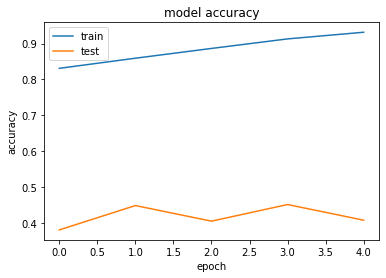

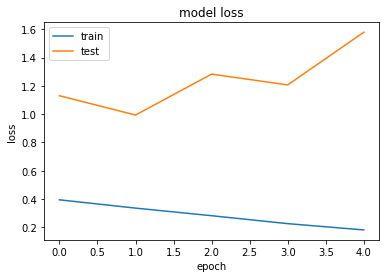

In [82]:
# Plotting the loss and accuracy

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.2 Applying Sentiment Prediction on the Best Model

#### Models with the best predictions are Naive Bayes and Random Forest models. They will be used in predicting the sentiment value and compare them to the true sentiment for each political parties

# Naive Bayes - Model Implementation

In [149]:
# Defining the X variable for the elction data
X_text_election = data_tweet_election['cleaned']

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

In [78]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7508
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     29851
           4       0.78      0.70      0.74     30149

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



In [79]:
# Predicted Sentiment Using Generic Data
y_pred

array([4, 4, 0, ..., 0, 0, 4], dtype=int64)

In [80]:
# Predicted Sentiment Using Election Data
y_pred_election = nb.predict(X_text_election)
y_pred_election

array([4, 4, 0, ..., 4, 4, 4], dtype=int64)

In [81]:
data_tweet_election.head(5)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None


In [82]:
data_tweet_election['sentiment'].value_counts()

positive    1127
negative    1006
Name: sentiment, dtype: int64

In [83]:
data_tweet_generic[data_tweet_generic['class']==0].head(10)

,class,id,date,query,user,text,cleaned
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset thatn update facebook texting might cry ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad usen see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rains bit bit l...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana_k nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,twittera que muera


In [84]:
data_tweet_generic[data_tweet_generic['class']==4].head(10)

,class,id,date,query,user,text,cleaned
100000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health4uandpets u guys r best
100001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
100002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
100003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,beingn really cheap hurts much eat real food p...
100004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn2 effect everyone
100005,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,productoffearn tell burst laughing really loud...
100006,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,r_keith_hill thans response ihad already find ...
100007,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",keepinupwkris jealous hope great time vegas li...
100008,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",tommcfly ah congrats mr fletcher finally joini...
100009,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4voip respondedt helping type forgive errors


### Based on the observations of the above headings for the sentiment values 0 and 4, 0 seems to be associated with negative sentiment and 4 with positive sentiment. For the predction on the election data set, values within the "sentiment" category colum will be converted where positive will become 4 and negative will become 0.

In [85]:
data_tweet_election.head(10)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...,None,Conservative,None
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia ppc rocky dong hands best election vi...,None,None,None
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",liberals double promised 2015 national debt ne...,Liberal,None,NDP
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...,Liberal,None,None
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...,Liberal,Conservative,None


In [86]:
class_election = {"sentiment":     {"positive": 4, "negative": 0}}

In [87]:
data_tweet_election.replace(class_election, inplace=True)
data_tweet_election.head(10)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None
1,4,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None
3,4,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...,None,Conservative,None
6,4,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia ppc rocky dong hands best election vi...,None,None,None
7,4,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",liberals double promised 2015 national debt ne...,Liberal,None,NDP
8,0,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...,Liberal,None,None
9,0,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...,Liberal,Conservative,None


In [88]:
print('accuracy %s' % accuracy_score(y_pred_election,data_tweet_election.sentiment ))
print(classification_report(y_pred_election, data_tweet_election.sentiment))

accuracy 0.5752461322081576
              precision    recall  f1-score   support

           0       0.46      0.56      0.51       828
           4       0.68      0.58      0.63      1305

    accuracy                           0.58      2133
   macro avg       0.57      0.57      0.57      2133
weighted avg       0.59      0.58      0.58      2133



In [89]:
# Add a column with class values in Unclassified_tweets dataset
data_tweet_election['p_class'] = y_pred_election

In [90]:
data_tweet_election.head(5)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP,p_class
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None,4
1,4,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None,4
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None,0
3,4,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None,0


#### The dataframe data_tweet_election will be divided into positive and negative datasets to summarize the total count of the sentiments by party.

In [91]:
# Positive data setting for the PREDICTED SENTIMENT
positive_data = data_tweet_election.loc[data_tweet_election['p_class'] == 4]

In [92]:
# Negative data setting for the PREDICTED SENTIMENT
negative_data = data_tweet_election.loc[data_tweet_election['p_class'] == 0]

In [93]:
# Getting the total positive counts by party in the positive_data for the PREDICTED SENTIMENT
print(positive_data['Liberal'].value_counts())
print(positive_data['Conservative'].value_counts())
print(positive_data['NDP'].value_counts())

Liberal    384
Name: Liberal, dtype: int64
Conservative    418
Name: Conservative, dtype: int64
NDP    158
Name: NDP, dtype: int64


In [94]:
# Getting the total negative counts by party in the negative_data for the PREDICTED SENTIMENT
print(negative_data['Liberal'].value_counts())
print(negative_data['Conservative'].value_counts())
print(negative_data['NDP'].value_counts())

Liberal    229
Name: Liberal, dtype: int64
Conservative    260
Name: Conservative, dtype: int64
NDP    86
Name: NDP, dtype: int64


In [95]:
# Positive data setting for the REAL SENTIMENT VALUE
positive_data_true = data_tweet_election.loc[data_tweet_election['sentiment'] == 4]

In [96]:
# Negative data setting for the REAL SENTIMENT VALUE
negative_data_true = data_tweet_election.loc[data_tweet_election['sentiment'] == 0]

In [97]:
# Getting the total positive counts by party in the positive_data for the PREDICTED SENTIMENT
print(positive_data_true['Liberal'].value_counts())
print(positive_data_true['Conservative'].value_counts())
print(positive_data_true['NDP'].value_counts())

Liberal    296
Name: Liberal, dtype: int64
Conservative    230
Name: Conservative, dtype: int64
NDP    147
Name: NDP, dtype: int64


In [98]:
# Getting the total negative counts by party in the negative_data for the PREDICTED SENTIMENT
print(negative_data_true['Liberal'].value_counts())
print(negative_data_true['Conservative'].value_counts())
print(negative_data_true['NDP'].value_counts())

Liberal    317
Name: Liberal, dtype: int64
Conservative    448
Name: Conservative, dtype: int64
NDP    97
Name: NDP, dtype: int64


In [99]:
#creating the data frame using the sentiment count for the predicted sentiment and the real sentiment
data_1 = {'Predicted Positive Sentiment Count':[384,418,158,960],'Actual Positive Sentiment Count':[296,230,147,673]}

data_2 = {'Predicted Negative Sentiment Count':[229,260,86,575],'Actual Negative Sentiment Count':[317,448,97,862]}

#Create pandas DataFrame
df_1 = pd.DataFrame(data_1, index=['Liberals','Conservatives','NDP','Total'])
df_2 = pd.DataFrame(data_2, index=['Liberals','Conservatives','NDP','Total'])


In [100]:
#print the data
df_1

,Predicted Positive Sentiment Count,Actual Positive Sentiment Count
Liberals,384,296
Conservatives,418,230
NDP,158,147
Total,960,673


In [101]:
#print the data
df_2

,Predicted Negative Sentiment Count,Actual Negative Sentiment Count
Liberals,229,317
Conservatives,260,448
NDP,86,97
Total,575,862


## Visualization: Predicted Positive Sentiment vs. Actual Positive Sentiment

In [271]:
# Preparing the data for the visualization
data_1_nb = {'Predicted_Positive_Sentiment_Count':[384,418,158],'Actual_Positive_Sentiment_Count':[296,230,147]}
data_2_nb = {'Predicted_Negative_Sentiment_Count':[229,260,86],'Actual_Negative_Sentiment_Count':[317,448,97]}

In [274]:
# Putting the data into a dataframe format
df_nb_1 = pd.DataFrame(data_1_nb)
df_nb_2 = pd.DataFrame(data_2_nb)

In [275]:
#Checking the data
df_nb_1

,Predicted_Positive_Sentiment_Count,Actual_Positive_Sentiment_Count
0,384,296
1,418,230
2,158,147


In [276]:
#Checking the data
df_nb_2

,Predicted_Negative_Sentiment_Count,Actual_Negative_Sentiment_Count
0,229,317
1,260,448
2,86,97


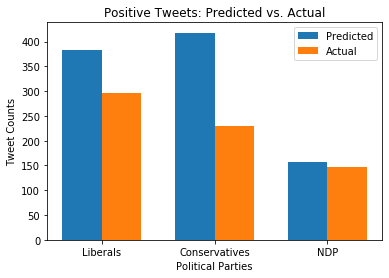

In [278]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = "Predicted Positive|Actual Positive".split("|")

# Generate dummy data into a dataframe
df = df_nb_1

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
Predicted = ax.bar(index,[df["Predicted_Positive_Sentiment_Count"].iloc[0],df["Predicted_Positive_Sentiment_Count"].iloc[1],df["Predicted_Positive_Sentiment_Count"].iloc[2]], bar_width,
                label="Predicted")

Actual = ax.bar(index+bar_width, [df["Actual_Positive_Sentiment_Count"].iloc[0],df["Actual_Positive_Sentiment_Count"].iloc[1],df["Actual_Positive_Sentiment_Count"].iloc[2]],
                 bar_width, label="Actual")

ax.set_xlabel('Political Parties')
ax.set_ylabel('Tweet Counts')
ax.set_title('Positive Tweets: Predicted vs. Actual')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Liberals", "Conservatives", "NDP"])
ax.legend()

plt.show()

## Visualization: Predicted Negative Sentiment vs. Actual Negative Sentiment

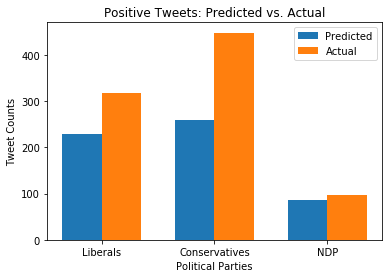

In [280]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = "Predicted Positive|Actual Positive".split("|")

# Generate dummy data into a dataframe
df = df_nb_2

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
Predicted = ax.bar(index,[df["Predicted_Negative_Sentiment_Count"].iloc[0],df["Predicted_Negative_Sentiment_Count"].iloc[1],df["Predicted_Negative_Sentiment_Count"].iloc[2]], bar_width,
                label="Predicted")

Actual = ax.bar(index+bar_width, [df["Actual_Negative_Sentiment_Count"].iloc[0],df["Actual_Negative_Sentiment_Count"].iloc[1],df["Actual_Negative_Sentiment_Count"].iloc[2]],
                 bar_width, label="Actual")

ax.set_xlabel('Political Parties')
ax.set_ylabel('Tweet Counts')
ax.set_title('Positive Tweets: Predicted vs. Actual')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Liberals", "Conservatives", "NDP"])
ax.legend()

plt.show()

## Discussion - Naive Bayes Model Implementation

## 2019 Canadian Federal Election Actual Results

### Actual Final Popular Vote Counts
### Liberals: 33.1%
### Conservatives: 34.4%
### NDP: 15.9%

### Discussion

### Based on the last polling before the elction and comparing that results to the final vote counts. The Liberals ended up getting 6.4% vote LESS Conservatives ended up getting 3% MORE and the NDPs getting 3.8% LESS.
### The above dataframes(df_1 & df_2), show an interesting outcome when the predicted sentiment counts are looked at. The predicted positive sentiment for the Liberals were much less than the actual positive sentiment count. It shows that 40% of the toal predicted positive sentiments were related to the Liberals where as 43.9% of the actual positive sentiments were related to the Liberals. Furthurmore, the conservatives shows a higher predicted positive sentiment compares to the actual positive sentiment with 43.5% and 34.1%. Considering that the Liberals ended up getting 6.4% less than the final poll before the election and the Conservatives getting 3% more than the final polls, the predicted model can perhaps show that this shift in outcome could have been anticipated.

### Similar trend can also be observed with the negative sentiments as well. The predicted sentiments show that the Liberals got 39.8% of the total predicted sentiments vs.36.7% of the actual sentiments. The Conservatives got 45.2% of the predicted sentiments vs. 51.9% actual sentiments. This shows that the predicted model shows that Conservatives getting less negative sentiment and the LIberals getting more negative sentiments.

# Random Forest Model - Model Implementation

In [141]:
from sklearn.ensemble import RandomForestClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators = 200, random_state = 0)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [150]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.75375
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     29851
           4       0.76      0.75      0.75     30149

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



In [143]:
# Predicted Sentiment Using Generic Data
y_pred

array([4, 4, 0, ..., 0, 4, 4], dtype=int64)

In [153]:
# Predicted Sentiment Using Election Data
y_pred_election = logreg.predict(X_text_election)
y_pred_election

array([0, 4, 4, ..., 4, 4, 4], dtype=int64)

In [154]:
# Add a column with class values in Unclassified_tweets dataset
data_tweet_election['p_class_rf'] = y_pred_election

In [155]:
data_tweet_election.head(5)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP,p_class,p_class_rf
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None,4,0
1,4,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None,4,4
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None,0,4
3,4,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None,0,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None,0,0


In [156]:
# Positive data setting for the PREDICTED SENTIMENT-Random Forest
positive_data_rf = data_tweet_election.loc[data_tweet_election['p_class_rf'] == 4]

In [157]:
# Negative data setting for the PREDICTED SENTIMENT-Random Forest
negative_data_rf = data_tweet_election.loc[data_tweet_election['p_class_rf'] == 0]

In [158]:
# Getting the total positive counts by party in the positive_data for the PREDICTED SENTIMENT-Random FOrest
print(positive_data_rf['Liberal'].value_counts())
print(positive_data_rf['Conservative'].value_counts())
print(positive_data_rf['NDP'].value_counts())

Liberal    385
Name: Liberal, dtype: int64
Conservative    443
Name: Conservative, dtype: int64
NDP    169
Name: NDP, dtype: int64


In [159]:
# Getting the total negative counts by party in the negative_data for the PREDICTED SENTIMENT-Random Forest
print(negative_data_rf['Liberal'].value_counts())
print(negative_data_rf['Conservative'].value_counts())
print(negative_data_rf['NDP'].value_counts())

Liberal    228
Name: Liberal, dtype: int64
Conservative    235
Name: Conservative, dtype: int64
NDP    75
Name: NDP, dtype: int64


In [258]:
#creating the data frame using the sentiment count for the predicted sentiment and the real sentiment
data_1 = {'Predicted_Positive_Sentiment_Count_rf':[385,443,169,997],'Actual_Positive_Sentiment_Count':[296,230,147,673]}

data_2 = {'Predicted_Negative_Sentiment_Count_rf':[228,235,75,538],'Actual_Negative_Sentiment_Count':[317,448,97,862]}

#Create pandas DataFrame
df_1 = pd.DataFrame(data_1, index=['Liberals','Conservatives','NDP','Total'])
df_2 = pd.DataFrame(data_2, index=['Liberals','Conservatives','NDP','Total'])

In [256]:
#print the data
df_1

,Predicted_Positive_Sentiment_Count_rf,Actual_Positive_Sentiment_Count
Liberals,385,296
Conservatives,443,230
NDP,169,147
Total,997,673


In [259]:
#print the data
df_2

,Predicted_Negative_Sentiment_Count_rf,Actual_Negative_Sentiment_Count
Liberals,228,317
Conservatives,235,448
NDP,75,97
Total,538,862


## Visualization: Predicted Positive Sentiment vs. Actual Positive Sentiment

In [262]:
# Preparing the data for the visualization
data_1_vis = {'Predicted_Positive_Sentiment_Count_rf':[385,443,169],'Actual_Positive_Sentiment_Count':[296,230,147]}
data_2_vis = {'Predicted_Negative_Sentiment_Count_rf':[228,235,75],'Actual_Negative_Sentiment_Count':[317,448,97]}

In [265]:
# Putting the data into a dataframe format
df_11 = pd.DataFrame(data_1_vis)
df_21 = pd.DataFrame(data_2_vis)

In [267]:
#Checking the data
df_21

,Predicted_Negative_Sentiment_Count_rf,Actual_Negative_Sentiment_Count
0,228,317
1,235,448
2,75,97


In [266]:
#Checking the data
df_11

,Predicted_Positive_Sentiment_Count_rf,Actual_Positive_Sentiment_Count
0,385,296
1,443,230
2,169,147


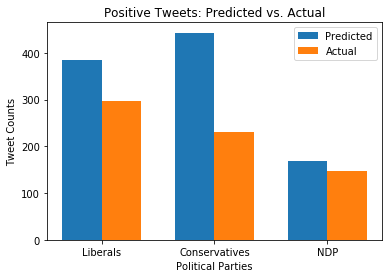

In [268]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = "Predicted Positive|Actual Positive".split("|")

# Generate dummy data into a dataframe
df = df_11

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
Predicted = ax.bar(index,[df["Predicted_Positive_Sentiment_Count_rf"].iloc[0],df["Predicted_Positive_Sentiment_Count_rf"].iloc[1],df["Predicted_Positive_Sentiment_Count_rf"].iloc[2]], bar_width,
                label="Predicted")

Actual = ax.bar(index+bar_width, [df["Actual_Positive_Sentiment_Count"].iloc[0],df["Actual_Positive_Sentiment_Count"].iloc[1],df["Actual_Positive_Sentiment_Count"].iloc[2]],
                 bar_width, label="Actual")

ax.set_xlabel('Political Parties')
ax.set_ylabel('Tweet Counts')
ax.set_title('Positive Tweets: Predicted vs. Actual')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Liberals", "Conservatives", "NDP"])
ax.legend()

plt.show()

## Visualization: Predicted Negative Sentiment vs. Actual Negative Sentiment

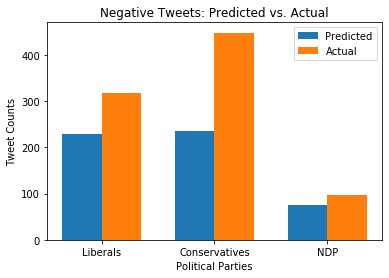

In [270]:
s = "Predicted Negative|Actual Negative".split("|")

# Generate dummy data into a dataframe
df = df_21

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
Predicted = ax.bar(index,[df["Predicted_Negative_Sentiment_Count_rf"].iloc[0],df["Predicted_Negative_Sentiment_Count_rf"].iloc[1],df["Predicted_Negative_Sentiment_Count_rf"].iloc[2]], bar_width,
                label="Predicted")

Actual = ax.bar(index+bar_width, [df["Actual_Negative_Sentiment_Count"].iloc[0],df["Actual_Negative_Sentiment_Count"].iloc[1],df["Actual_Negative_Sentiment_Count"].iloc[2]],
                 bar_width, label="Actual")

ax.set_xlabel('Political Parties')
ax.set_ylabel('Tweet Counts')
ax.set_title('Negative Tweets: Predicted vs. Actual')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Liberals", "Conservatives", "NDP"])
ax.legend()

plt.show()

## Discussion - Random Forest Implementation

## 2019 Canadian Federal Election Actual Results

### Actual Final Popular Vote Counts
### Liberals: 33.1%
### Conservatives: 34.4%
### NDP: 15.9%

### Discussion

### Based on the last polling before the elction and comparing that results to the final vote counts. The Liberals ended up getting 6.4% vote LESS Conservatives ended up getting 3% MORE and the NDPs getting 3.8% LESS.
### The above dataframes(df_1 & df_2) for the random forest also show a similar results as Naive Bayes model. The Liberals are showing 38.6% positive sentiment with the Random Forest model and the conservatives are showing 44.4% positive sentiment. The NDPs were predicted at 16.9% with the positive sentiments. When these percentages are compared to the actual sentiment count column in df_1, the LIberals are showing 43.9%, the Conservatives with 34.1% and the NDPs with 21.8%. Interestingly, the actual results of the popular vote counts also shows lower than expected for the LIberals, higher than expected for Conservatives and lower than expected for the NDPs. So it is interesting how the predicted values are showing similar trend with the Random Forest model similar to the Naive Bayes.

### Similar trend can also be observed with the negative sentiments as well. The predicted sentiments show that the Liberals got 42.3% of the total predicted sentiments vs.36.7% of the actual sentiments. The Conservatives got 43.6% of the predicted sentiments vs. 51.9% actual sentiments and the NDPs got 13.9% vs the actual sentiment of 11.2%. The Liberals ended up getting higher negative predicted sentiments vs actual, Conservatives got lower predicted negative sentiment vs actual and the NDPs got higher negative predicted sentiment vs actual. Consistent with the trend of the positive predicted sentiments, we are observing a similar trend with the negative sentiments.

## Negative Sentiment Modelling

In [102]:
data_tweet_election.head(10)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP,p_class
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None,4
1,4,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n space_station n etobi...,None,None,None,4
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None,0
3,4,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavotes n n ncan...,None,None,None,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None,0
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...,None,Conservative,None,4
6,4,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia ppc rocky dong hands best election vi...,None,None,None,4
7,4,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",liberals double promised 2015 national debt ne...,Liberal,None,NDP,0
8,0,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...,Liberal,None,None,4
9,0,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...,Liberal,Conservative,None,4


In [103]:
# Positive data setting for the PREDICTED SENTIMENT
negative_election_data = data_tweet_election.loc[data_tweet_election['sentiment'] == 0]

In [104]:
negative_election_data.head(10)

,sentiment,negative_reason,text,cleaned,Liberal,Conservative,NDP,p_class
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadiann...,None,Conservative,None,4
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost 94 billion next 4 years a...,Liberal,None,None,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayers sick tired hard earned donate...,Liberal,None,None,0
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",canadavotes2019 facts blastfromthepast 2012 co...,None,Conservative,None,4
8,0,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward ncanada make mistakes full front...,Liberal,None,None,4
9,0,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagate nlet see receipts pays warren ...,Liberal,Conservative,None,4
14,0,Others,"b""#Kinsella runs deep w #CPC...both he and #Ly...",kinsella runs deep w cpc lyingandy crazed anti...,Liberal,Conservative,None,4
15,0,Tell lies,"b""#LyingAndy has a history of not answering em...",lyingandy history answering embarrassing quest...,None,Conservative,None,0
19,0,Scandal,"b""*Urgent* Please watch this video by David Ha...",urgent please watch video david haskell people...,None,Conservative,None,0
20,0,Others,"b'""... it\'s our policy not to comment on ille...",b policy comment illegal immoral nefarious act...,Liberal,Conservative,None,0


In [105]:
negative_election_data['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

In [106]:
X = negative_election_data.cleaned
y = negative_election_data['negative_reason']

In [107]:
#70% & 30% split for training and test data
# "cleaned" data represents each line of tweet in the data set and "class" represents the sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(negative_election_data["cleaned"].values, negative_election_data["negative_reason"].values, test_size=0.3, random_state=42)

# a) Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [109]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.4867549668874172
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.32      0.48        19
                            Economy       0.40      0.40      0.40        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.53      0.57      0.55       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.41      0.59      0.49        73
                         Separation       0.50      0.25      0.33         4
                          Tell lies       0.47      0.36      0.41        64
Women Reproductive right and Racism       0.67      0.25      0.36         8

                           accuracy                           0.49       302
                          macro avg       0.44      0.30      0.34       302
                       weighted avg       0.51

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# b) Naive Bayes

In [110]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

In [111]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.45364238410596025
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        19
                            Economy       0.00      0.00      0.00        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.44      0.75      0.56       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.45      0.60      0.52        73
                         Separation       0.00      0.00      0.00         4
                          Tell lies       1.00      0.06      0.12        64
Women Reproductive right and Racism       0.00      0.00      0.00         8

                           accuracy                           0.45       302
                          macro avg       0.21      0.16      0.13       302
                       weighted avg       0.5

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# c) Support Vector Machine (SVM)

In [112]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [113]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5033112582781457
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.37      0.54        19
                            Economy       0.40      0.40      0.40        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.55      0.56      0.56       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.42      0.66      0.51        73
                         Separation       0.50      0.25      0.33         4
                          Tell lies       0.51      0.34      0.41        64
Women Reproductive right and Racism       0.75      0.38      0.50         8

                           accuracy                           0.50       302
                          macro avg       0.46      0.33      0.36       302
                       weighted avg       0.53

# d) KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [115]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.45364238410596025
                                     precision    recall  f1-score   support

                    Climate Problem       0.86      0.32      0.46        19
                            Economy       0.36      0.50      0.42        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.49      0.64      0.55       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.40      0.49      0.44        73
                         Separation       1.00      0.25      0.40         4
                          Tell lies       0.37      0.17      0.23        64
Women Reproductive right and Racism       1.00      0.25      0.40         8

                           accuracy                           0.45       302
                          macro avg       0.50      0.29      0.32       302
                       weighted avg       0.4

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# e) Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=500)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [117]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.39403973509933776
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        19
                            Economy       0.00      0.00      0.00        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.39      1.00      0.57       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.00      0.00      0.00        73
                         Separation       0.00      0.00      0.00         4
                          Tell lies       0.00      0.00      0.00        64
Women Reproductive right and Racism       0.00      0.00      0.00         8

                           accuracy                           0.39       302
                          macro avg       0.04      0.11      0.06       302
                       weighted avg       0.1

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# f) Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators = 200, random_state = 0)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [119]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5629139072847682
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.37      0.54        19
                            Economy       0.43      0.30      0.35        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.52      0.87      0.65       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.56      0.45      0.50        73
                         Separation       0.00      0.00      0.00         4
                          Tell lies       0.82      0.36      0.50        64
Women Reproductive right and Racism       0.00      0.00      0.00         8

                           accuracy                           0.56       302
                          macro avg       0.37      0.26      0.28       302
                       weighted avg       0.59

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# g) XGBoost

In [120]:
import xgboost as xgb

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(random_state=1,learning_rate=0.01)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [121]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5529801324503312
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.37      0.54        19
                            Economy       0.67      0.40      0.50        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.48      0.93      0.64       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.65      0.27      0.38        73
                         Separation       0.00      0.00      0.00         4
                          Tell lies       0.89      0.38      0.53        64
Women Reproductive right and Racism       0.50      0.12      0.20         8

                           accuracy                           0.55       302
                          macro avg       0.47      0.28      0.31       302
                       weighted avg       0.63

# h) Doc2vec and Logistic Regression

In [330]:
!pip install gensim
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(negative_election_data["cleaned"].values, negative_election_data["negative_reason"].values, test_size=0.3, random_state=0)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test


In [331]:
all_data[:2]

[TaggedDocument(words=['b', 'justintrudeau', 'tyler', 'watt', 'x9d', 'xa4', 'xef', 'xb8', 'x8f', 'tylerwhat16', 'n', 'nvote', 'xa8', 'pm', 'justin', 'trudeau', 'n', 'nas', 'gay', 'millennial', 'totally', 'afraid', 'andrew', 'scheer', 'nadavotes', 'uptoyouth', 'lgbtqrights', 'liberalparty', 'justintrudeaunadiannada', 'lgbtq', 'x8f', 'xb3', 'xef', 'xb8', 'x8f', 'x8d', 'x8c', 'x88'], tags=['Train_0']),
 TaggedDocument(words=['b', 'good', 'question', 'cpc19', 'voters', 'stay', 'smear', 'mongering', 'party', 'st', 'lot', 'may', 'truer', 'conservative', 'party', 'max', 'ppc', 'scheer', 'blown', 'chance', 'pm', 'time', 'shake', 'conservative', 'environment', 'cpc'], tags=['Train_1'])]

In [332]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

# range(2) should actually be more like 30 but to save computational time used 3. 
for epoch in range(3): 
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1006/1006 [00:00<00:00, 497755.08it/s]


In [333]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [334]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [335]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.347682119205298


C:\Users\gyoun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        10
                            Economy       0.67      0.11      0.18        19
           Healthcare and Marijuana       0.00      0.00      0.00         1
                             Others       0.43      0.46      0.44       115
                          Privilege       0.00      0.00      0.00         1
                            Scandal       0.38      0.36      0.37        92
                         Separation       0.00      0.00      0.00         3
                          Tell lies       0.25      0.31      0.28        54
Women Reproductive right and Racism       0.00      0.00      0.00         7

                           accuracy                           0.35       302
                          macro avg       0.19      0.14      0.14       302
                       weighted avg       0.36      0.35      0.34       3

# i) BONUS (Deep Learning Algorithms) Neural Net for Text Classification

In [122]:
!pip install tensorflow
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\gyoun\anaconda3\lib\site-packages (2.0.0)


In [123]:
!pip install keras

In [124]:
import itertools
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(negative_election_data) * .7)
train_posts = negative_election_data['cleaned'][:train_size]
train_tags = negative_election_data['negative_reason'][:train_size]

test_posts = negative_election_data['cleaned'][train_size:]
test_tags = negative_election_data['negative_reason'][train_size:]

max_words = 6000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

Using TensorFlow backend.


In [125]:
print(x_train.shape, x_test.shape)

(704, 6000) (302, 6000)


In [126]:
x_train[0:4]
len(x_train[0])

6000

In [127]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [128]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [129]:
batch_size = 32
epochs = 5

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


Train on 633 samples, validate on 71 samples
Epoch 1/5
633/633 [==============================] - 1s 2ms/step - loss: 2.0559 - accuracy: 0.3428 - val_loss: 1.7664 - val_accuracy: 0.3380
Epoch 2/5
633/633 [==============================] - 1s 2ms/step - loss: 1.3949 - accuracy: 0.6098 - val_loss: 1.5401 - val_accuracy: 0.3662
Epoch 3/5
633/633 [==============================] - 1s 2ms/step - loss: 0.9477 - accuracy: 0.7930 - val_loss: 1.4883 - val_accuracy: 0.4225
Epoch 4/5
633/633 [==============================] - 1s 2ms/step - loss: 0.5802 - accuracy: 0.9131 - val_loss: 1.5136 - val_accuracy: 0.4366
Epoch 5/5
633/633 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.9589 - val_loss: 1.5509 - val_accuracy: 0.4225


In [130]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)

302/302 [==============================] - 0s 195us/step


In [131]:
print('Test accuracy:', score[1]) # The accuracy of the test data

Test accuracy: 0.5463576316833496


In [132]:
print(score[0]) # The loss of the test data

1.3454574543908733


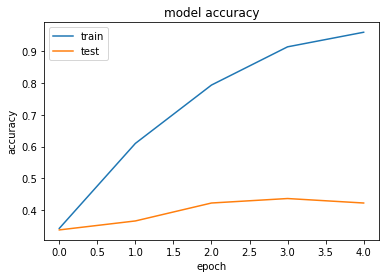

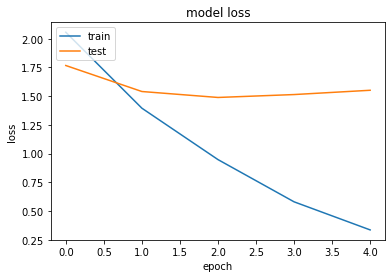

In [133]:
# Plotting the loss and accuracy

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### All the models have been fitted using the negative_reason as a dependent variable. The modes are providing a varying degree of accuracies. 